### Machine Learning project

# 0. Index
* [1. Feature engineering](#1)
    * [1.1 Cleaning and types](#1.1)
    * [1.2 Imputation and nulls](#1.2)
    * [1.3 Feature encoding](#1.3)
    * [1.4 Targets preparation](#1.4)
* [2. Modelling](#2)

# 1. Feature engineering<a id=1>

### 1.1 Cleaning and types<a id=1.1>

The first thing is loading the dataframe. The first column of the CSV file is an index of the record. The types are diverse, but first all columns are loaded as strings.

In [40]:
import pandas as pd
pd.options.display.max_columns = None

# Load dataframe with first column as the index
df = pd.read_csv('rec_sys_alumnos.csv', index_col=0, dtype=str)
df

,cod_persona,mes,pais,sexo,edad,fecha1,xti_empleado,xti_nuevo_cliente,num_antiguedad,xti_rel,fec_ult_cli_1t,xti_rel_1mes,tip_rel_1mes,indresi,indext,des_canal,xti_extra,tip_dom,cod_provincia,xti_actividad_cliente,imp_renta,id_segmento,mean_engagement,ind_prod1,ind_prod2,ind_prod3,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,ind_prod11,ind_prod12,ind_prod13,ind_prod14,ind_prod15,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,178103,2015-01-28,ES,H,35,2015-01-12,N,0.0,6,1.0,NaN,1.0,A,S,N,KHL,N,1.0,29.0,1.0,87218.1,02 - PARTICULARES,6.134599897559383,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
1,503082,2015-01-28,ES,V,27,2012-08-10,N,0.0,35,1.0,NaN,1,I,S,N,KHE,N,1.0,40.0,0.0,70777.59,03 - UNIVERSITARIO,5.4146725371683715,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
2,502996,2015-01-28,ES,V,37,2012-08-10,N,0.0,35,1.0,NaN,1.0,A,S,N,KFC,N,1.0,8.0,0.0,104035.08,02 - PARTICULARES,6.301282644752064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
3,503053,2015-01-28,ES,H,23,2012-08-10,N,0.0,35,1.0,NaN,1,A,S,N,KHE,N,1.0,39.0,1.0,136930.23,03 - UNIVERSITARIO,5.014351637772052,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,0
4,503031,2015-01-28,ES,H,44,2012-08-10,N,0.0,35,1.0,NaN,1.0,I,S,N,KAT,N,1.0,28.0,0.0,110245.53,02 - PARTICULARES,6.85176969517488,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641702,256354,2016-04-28,ES,V,25,2014-08-18,N,0.0,25,1.0,NaN,1,A,S,N,RED,N,1.0,30.0,1.0,81987.18000000001,02 - PARTICULARES,5.2185201144602615,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,0
641703,256273,2016-04-28,ES,H,65,2014-08-18,N,0.0,20,1.0,NaN,1,I,S,N,KAT,N,1.0,41.0,0.0,131135.7,02 - PARTICULARES,8.28077786276117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
641704,256253,2016-04-28,ES,V,42,2014-08-18,N,0.0,20,1.0,NaN,1,I,S,N,KFC,N,1.0,8.0,0.0,74745.29999999999,02 - PARTICULARES,6.69926081286394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
641705,256296,2016-04-28,ES,H,42,2014-08-18,N,0.0,20,1.0,NaN,1,I,S,N,KFC,N,1.0,28.0,0.0,215942.1,02 - PARTICULARES,6.69926081286394,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0,0


In [41]:
# Check nulls in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634682 entries, 0 to 641706
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   cod_persona            634682 non-null  object
 1   mes                    634682 non-null  object
 2   pais                   634626 non-null  object
 3   sexo                   634617 non-null  object
 4   edad                   634682 non-null  object
 5   fecha1                 634626 non-null  object
 6   xti_empleado           634626 non-null  object
 7   xti_nuevo_cliente      634626 non-null  object
 8   num_antiguedad         634682 non-null  object
 9   xti_rel                634626 non-null  object
 10  fec_ult_cli_1t         36 non-null      object
 11  xti_rel_1mes           629040 non-null  object
 12  tip_rel_1mes           629040 non-null  object
 13  indresi                634626 non-null  object
 14  indext                 634626 non-null  object
 15  

Before going on, column ```fec_ult_cli_1t``` has only 36 non-null records. The best it can be done with this column is drop it completely.

In [42]:
# Drop 'fec_ult_cli_1t' column as it as only 36 non-null records out of 634682 records
df.drop('fec_ult_cli_1t', axis=1, inplace=True)

Lots of records have blank spaces at the beginning and at the end, and nulls are recorded as ```NA```. To properly identify the values of the records, ```strip``` must be applied. Also, a good practice is identify the nulls as ```float('nan')```.

In [43]:
# Trim spaces at the beginning and at the end of each record
df = df.apply(lambda x: x.str.strip())

# Set 'NA' strings as nan value
df = df.replace('NA', float('nan'))

Now, a manual classification of the columns by their type is performed, with 5 types: ```int``` and ```float``` for the numeric columns, ```datetime``` for the dates, ```category``` for the categorical columns and binary for the categorical columns with only two categories. For now, numeric columns are converted to ```float``` because nulls (```nan```) are of ```float``` type.

In [44]:
columns = df.columns.tolist()

# Manual classification of columns by their type (products are already binary)
asint = [0, 4, 8, 17]
products = list(range(22, 47))
asfloat = [19, 21]
asdate = [1, 5]
ascategory = [2, 6, 10, 11, 14, 20]
asbinary = [3, 7, 9, 12, 13, 15, 16, 18]

# Transform some columns to binary
from numpy import mod
for i in asbinary:
    options = pd.Series(df[columns[i]].unique()).sort_values().values
    binary = [0, 1]
    for j in [-2, -3]:
        df[columns[i]] = df[columns[i]].replace(options[mod(j, len(options))], binary[mod(j, len(binary)+1)])

# Convert numeric columns to float (including binary)
for i in asfloat + asint + products + asbinary:
    df[columns[i]] = df[columns[i]].astype('float64')

# Convert date columns to datetime
for i in asdate:
    df[columns[i]] = pd.to_datetime(df[columns[i]])

# Special case for 'xti_rel_1mes' that has numbers within the categories and differenciates between int and float
def try_num(x):
    try:
        return int(float(x))
    except ValueError:
        return x
df['xti_rel_1mes'] = df['xti_rel_1mes'].apply(lambda x: try_num(x))

# Convert some columns to categorical
for i in ascategory:
    df[columns[i]] = df[columns[i]].astype('category')

Check the types now:

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634682 entries, 0 to 641706
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   cod_persona            634682 non-null  float64       
 1   mes                    634682 non-null  datetime64[ns]
 2   pais                   634626 non-null  category      
 3   sexo                   634617 non-null  float64       
 4   edad                   634626 non-null  float64       
 5   fecha1                 634626 non-null  datetime64[ns]
 6   xti_empleado           634626 non-null  category      
 7   xti_nuevo_cliente      634626 non-null  float64       
 8   num_antiguedad         634626 non-null  float64       
 9   xti_rel                634626 non-null  float64       
 10  xti_rel_1mes           629040 non-null  category      
 11  tip_rel_1mes           629040 non-null  category      
 12  indresi                634626 non-null  floa

The targets are the products (```ind_prodX``` for ```X = 1, ..., 25```), so no ```nan``` values are allowed there and those records must be dropped.

In [46]:
# Drop 'nan' values from the target columns
for i in products:
    df.drop(df[df[columns[i]].isna()].index, inplace=True)

### 1.2 Imputation and nulls<a id=1.2>

The dataframe has several null records. Before anything else, a study must be performed on this nulls, to decide if they are dropped or imputed and how.

In [47]:
df.isna().sum()

cod_persona                   0
mes                           0
pais                         28
sexo                         37
edad                         28
fecha1                       28
xti_empleado                 28
xti_nuevo_cliente            28
num_antiguedad               28
xti_rel                      28
xti_rel_1mes               5614
tip_rel_1mes               5614
indresi                      28
indext                       28
des_canal                  7150
xti_extra                    28
tip_dom                       0
cod_provincia              2918
xti_actividad_cliente        28
imp_renta                124136
id_segmento                7375
mean_engagement            5614
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod8                     0
ind_prod9                     0
ind_prod

* ```tip_dom``` has no nulls, so it is already set.


* ```fec_ult_cli_1t``` was already dropped at the beginning.

* ```pais```, ```edad```, ```fecha1```, ```xti_empleado```, ```xti_nuevo_cliente```, ```num_antiguedad```, ```xti_rel```, ```indresi```, ```indext```, ```xti_extra``` and ```xti_actividad_cliente``` have the same number of nulls: 28. A quick check shows that they correspond to the same records. Hence, it is convenient to drop those records, since a lot of information is held in those columns.

In [48]:
df[df['pais'].isna() &
   df['edad'].isna() &
   df['fecha1'].isna() &
   df['xti_empleado'].isna() &
   df['xti_nuevo_cliente'].isna() &
   df['num_antiguedad'].isna() &
   df['xti_rel'].isna() &
   df['indresi'].isna() &
   df['indext'].isna() &
   df['xti_extra'].isna() &
   df['xti_actividad_cliente'].isna()
  ].shape[0]

28

In [49]:
# pais, edad, fecha1, xti_empleado, xti_nuevo_cliente, num_antiguedad, xti_rel, indresi, indext, xti_extra, xti_actividad_cliente
# Drop 28 records with nulls
df.drop(df[df['pais'].isna()].index, inplace=True)

* ```imp_renta``` has around 1/6 of the records in blank. Before deciding which imputation will be done, it is necessary to see the distribution of this variable. A boxplot shows that the outliers are too far away from the box; furthermore, the standard deviation is even higher than the mean. Hence, a good way to impute ```nan``` values is with the median.

Number of outliers: 30157
Mean: 136707.08404125244
Std: 333955.44313509366
Median: 101297.34


<AxesSubplot:>

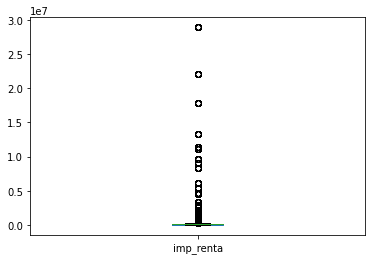

In [50]:
Q1 = df['imp_renta'].quantile(0.25)
Q3 = df['imp_renta'].quantile(0.75)
IQR = Q3 - Q1
n_outliers = ((df['imp_renta'] < (Q1 - 1.5 * IQR)) | (df['imp_renta'] > (Q3 + 1.5 * IQR))).sum()
print('Number of outliers:', n_outliers)

print('Mean:', df['imp_renta'].mean())
print('Std:', df['imp_renta'].std())
print('Median:', df['imp_renta'].median())

df['imp_renta'].plot.box()

In [51]:
# imp_renta
# Imputation of 'nan' values with the median
df['imp_renta'].fillna(round(df['imp_renta'].median(), 2), inplace=True)

* ```mean_engagement``` does not have too many nulls, but it is a numeric column and a study similar to that of ```imp_renta``` should be done.<br>
It seems that there are many outliers but compared with the 6 hundred thousand records they are just a few. Furthermore, the median is close to the mean, even though the standard deviation is a 21% of the mean. Hence, a good way to impute ```nan``` values is with the mean.

Number of outliers: 276
Mean: 6.425625940926844
Std: 1.3458810057023174
Median: 6.463518112854217


<AxesSubplot:>

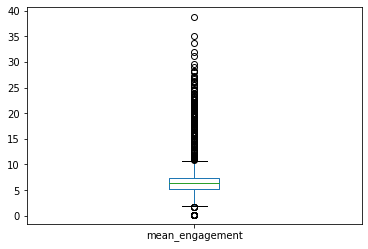

In [52]:
Q1 = df['mean_engagement'].quantile(0.25)
Q3 = df['mean_engagement'].quantile(0.75)
IQR = Q3 - Q1
n_outliers = ((df['mean_engagement'] < (Q1 - 1.5 * IQR)) | (df['mean_engagement'] > (Q3 + 1.5 * IQR))).sum()
print('Number of outliers:', n_outliers)

print('Mean:', df['mean_engagement'].mean())
print('Std:', df['mean_engagement'].std())
print('Median:', df['mean_engagement'].median())

df['mean_engagement'].plot.box()

In [53]:
# mean_engagement
# Imputation of 'nan' values with the mean of each province
df['mean_engagement'].fillna(round(df['mean_engagement'].mean(), 2), inplace=True)

* ```cod_provincia``` is a numeric column but each number is a code that matches a category (provinces). However, missing data could correspond to categories different than the categories already recorded, so they can be imputed with 'Other' category, or, in terms of numbers, with '0'.

In [54]:
# cod_provincia
# Replace 'nan' values with 0
df['cod_provincia'].fillna(0, inplace=True)

* ```des_canal``` is a categoric column that indicates the customer channel. Null data can be categorized as "Other".
<br> It is important to note that 'Other' is not included in the set of categories yet, so in order to replace ```nan```s with 'Other', this last must be added to the set of categories.

In [55]:
# des_canal
# Add 'Other' category and fill the 'nan' values with 'Other'
df['des_canal'] = df['des_canal'].cat.add_categories('Other').fillna('Other')

* Finally, ```sexo```, ```xti_rel_1mes```, ```tip_rel_1mes``` and ```id_segmento``` are categorical or binary columns and can be imputed in a simple way.<br>

In [56]:
# sexo, xti_rel_1mes, tip_rel_1mes, id_segmento
# Impute values with random choice according to the distribution of the corresponding column
from numpy import array
from numpy.random import choice
for col in ['sexo', 'xti_rel_1mes', 'tip_rel_1mes', 'id_segmento']:
    options = list(df[col].value_counts().to_dict().keys())
    value_counts = array(list(df[col].value_counts().to_dict().values()))
    probabs = value_counts / sum(value_counts)
    choices = {ind: choice(options, p=probabs) for ind in df[df[col].isna()].index}
    df[col] = df[col].fillna(choices)

In [57]:
# Convert all columns with integer data to int
for i in asint + products + asbinary:
    df[columns[i]] = df[columns[i]].astype('int64')

Check that there are not nulls anymore and that the types are correct.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634623 entries, 0 to 641706
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   cod_persona            634623 non-null  int64         
 1   mes                    634623 non-null  datetime64[ns]
 2   pais                   634623 non-null  category      
 3   sexo                   634623 non-null  int64         
 4   edad                   634623 non-null  int64         
 5   fecha1                 634623 non-null  datetime64[ns]
 6   xti_empleado           634623 non-null  category      
 7   xti_nuevo_cliente      634623 non-null  int64         
 8   num_antiguedad         634623 non-null  int64         
 9   xti_rel                634623 non-null  int64         
 10  xti_rel_1mes           634623 non-null  category      
 11  tip_rel_1mes           634623 non-null  category      
 12  indresi                634623 non-null  int6

In [59]:
df.isna().sum()

cod_persona              0
mes                      0
pais                     0
sexo                     0
edad                     0
fecha1                   0
xti_empleado             0
xti_nuevo_cliente        0
num_antiguedad           0
xti_rel                  0
xti_rel_1mes             0
tip_rel_1mes             0
indresi                  0
indext                   0
des_canal                0
xti_extra                0
tip_dom                  0
cod_provincia            0
xti_actividad_cliente    0
imp_renta                0
id_segmento              0
mean_engagement          0
ind_prod1                0
ind_prod2                0
ind_prod3                0
ind_prod4                0
ind_prod5                0
ind_prod6                0
ind_prod7                0
ind_prod8                0
ind_prod9                0
ind_prod10               0
ind_prod11               0
ind_prod12               0
ind_prod13               0
ind_prod14               0
ind_prod15               0
i

### 1.3 Feature encoding<a id=1.3>

A problem that might be passed over is ```num_antiguedad``` column. It is the customer seniority in months, but the minimum number it is found is 6, even though it can be ascertained there are clients with less seniority. This column can be recalculated from ```fecha1``` (date when the customer started being a client) and ```mes``` (date of the record).
Then, ```fecha1``` will be useless, since its information is held by ```num_antiguedad```

In [60]:
# Recalculate 'num_antiguedad' from 'mes' and 'fecha1'
from numpy import timedelta64
df['num_antiguedad'] = round((df['mes'] - df['fecha1']) / timedelta64(1, 'M')).astype('int64')
# Drop 'fecha1'
df.drop('fecha1', axis=1, inplace=True)

To include possible effects of stationality, the dates in ```mes``` can be converted to just the month and changed to categories. (This is saved in a new column, ```month```, so for now the information of ```mes``` is not lost.)

In [61]:
# Conversion of the dates in 'mes' to just the month and change to categories
df['month'] = df['mes'].dt.strftime('%b')
df['month'] = df['month'].astype('category')

Now there are only numeric columns (including ```int```, ```float``` and binary) and categoric columns. From here, two different approaches can be followed: regression and classification. In order to apply most of Machine Learning algorithms every column must be numeric, so a one-hot encoding will be performed to the categoric columns with few categories and an ordinal encoding will be performed to the categoric columns with lots of categories.

In [62]:
# Check categoric columns and how many categories they have
categoric_cols = list(df.select_dtypes(include=['category']).columns)
for col in categoric_cols:
    print(col, len(df[col].cat.categories))

pais 48
xti_empleado 4
xti_rel_1mes 5
tip_rel_1mes 4
des_canal 127
id_segmento 3
month 12


It is clear ```pais``` and ```des_canal``` have too many categories, so they will be ordinal encoded. The rest can be one-hot encoded.

In [63]:
# Ordinal encoding of 'pais' and 'des_canal'
ordenc_cols = ['pais', 'des_canal']
ordenc_dict = {}
for col in ordenc_cols:
    ordenc_dict[col] = {cat: num for num, cat in enumerate(df[col].cat.categories)}
    df[col] = df[col].apply(lambda x: ordenc_dict[col][x])
    df[col] = df[col].astype('int64')

# One-hot encoding of 'mes', 'xti_empleado', 'xti_rel1mes', 'tip_rel1mes' and 'id_segmento'
onehot_cols = [col for col in categoric_cols if col not in ordenc_cols]
df = pd.get_dummies(df, columns=onehot_cols)

One-hot encoding columns have been added at the end of the DataFrame. It is more comfortable to have the target columns at the end, so ```ind_prodX``` for ```X = 1, ..., 25``` are rearranged.

In [64]:
# Rearrange columns so target columns are at the end of the DataFrame
features = [col for col in df.columns if 'ind_prod' not in col]
targets = [col for col in df.columns if 'ind_prod' in col]
df = df[features + targets]
df

,cod_persona,mes,pais,sexo,edad,xti_nuevo_cliente,num_antiguedad,xti_rel,indresi,indext,des_canal,xti_extra,tip_dom,cod_provincia,xti_actividad_cliente,imp_renta,mean_engagement,xti_empleado_A,xti_empleado_B,xti_empleado_F,xti_empleado_N,xti_rel_1mes_0.0,xti_rel_1mes_1.0,xti_rel_1mes_2.0,xti_rel_1mes_3.0,xti_rel_1mes_4.0,tip_rel_1mes_A,tip_rel_1mes_I,tip_rel_1mes_P,tip_rel_1mes_R,id_segmento_01 - TOP,id_segmento_02 - PARTICULARES,id_segmento_03 - UNIVERSITARIO,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,ind_prod1,ind_prod2,ind_prod3,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,ind_prod11,ind_prod12,ind_prod13,ind_prod14,ind_prod15,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,178103,2015-01-28,16,0,35,0,1,0,1,0,119,0,1,29,1,87218.10,6.134600,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,503082,2015-01-28,16,1,27,0,30,0,1,0,116,0,1,40,0,70777.59,5.414673,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,502996,2015-01-28,16,1,37,0,30,0,1,0,94,0,1,8,0,104035.08,6.301283,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,503053,2015-01-28,16,0,23,0,30,0,1,0,116,0,1,39,1,136930.23,5.014352,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,503031,2015-01-28,16,0,44,0,30,0,1,0,23,0,1,28,0,110245.53,6.851770,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641702,256354,2016-04-28,16,1,25,0,20,0,1,0,125,0,1,30,1,81987.18,5.218520,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
641703,256273,2016-04-28,16,0,65,0,20,0,1,0,23,0,1,41,0,131135.70,8.280778,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641704,256253,2016-04-28,16,1,42,0,20,0,1,0,94,0,1,8,0,74745.30,6.699261,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641705,256296,2016-04-28,16,0,42,0,20,0,1,0,94,0,1,28,0,215942.10,6.699261,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
# Check all types (except for 'mes') are numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634623 entries, 0 to 641706
Data columns (total 70 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   cod_persona                     634623 non-null  int64         
 1   mes                             634623 non-null  datetime64[ns]
 2   pais                            634623 non-null  int64         
 3   sexo                            634623 non-null  int64         
 4   edad                            634623 non-null  int64         
 5   xti_nuevo_cliente               634623 non-null  int64         
 6   num_antiguedad                  634623 non-null  int64         
 7   xti_rel                         634623 non-null  int64         
 8   indresi                         634623 non-null  int64         
 9   indext                          634623 non-null  int64         
 10  des_canal                       634623 non-null  int64  

In [66]:
# Check value_counts of each product
prod_counts = pd.DataFrame()
for col in targets:
    prod_counts = prod_counts.append(df[col].value_counts())
prod_counts = prod_counts.fillna(0).astype('int64')
prod_counts

,0,1
ind_prod1,634559,64
ind_prod2,634623,0
ind_prod3,215149,419474
ind_prod4,634309,314
ind_prod5,582744,51879
ind_prod6,628281,6342
ind_prod7,628389,6234
ind_prod8,550903,83720
ind_prod9,607012,27611
ind_prod10,633337,1286


### 1.4 Targets preparation for products transition between months<a id=1.4>

The goal is to predict what the clients are going to do the following month. For that, it is necessary to divide the dataframe by months...

In [67]:
meses = pd.Series(df['mes'].unique()).sort_values().values

# List of dataframes. Each dataframe contains the records corresponding to one month
df_xmes = [df[df['mes'] == mes] for mes in meses]

# Create a new DataFrame with the same features but the products
df_status = df[features].copy()
# List of dataframes. Each dataframe contains the records corresponding to in-between months
df_status_xmes = [df_status[df_status['mes'] == mes] for mes in meses]

... and compare consecutive months to see what they have done in the past.

If a client of one month is not found in the following month, it is dropped, since it means abandonement and the goal is to predict new contracts.

In [68]:
# For each month calculate the product status with respect to the previous month, and store it in "df_status_xmes".
# After each calculation, append the DataFrame to new DataFrame "df_status"
# First transition is equal to data of first month
del(df_status)
df_status = pd.DataFrame(columns=features)

df_status_xmes[0][targets] = df_xmes[0][targets]
df_status = df_status.append(df_status_xmes[0])

for i in range(1, len(df_xmes)):
    product_status = df_xmes[i].merge(df_xmes[i-1][['cod_persona'] + targets], on='cod_persona', how='left')
    for p in targets:
        df_status_xmes[i][p] = product_status[p+'_x'].values - product_status[p+'_y'].fillna(0).values
    df_status = df_status.append(df_status_xmes[i])

# Assure that the types are correct
df_status = df_status.astype(df.dtypes.to_dict())

df_status

,cod_persona,mes,pais,sexo,edad,xti_nuevo_cliente,num_antiguedad,xti_rel,indresi,indext,des_canal,xti_extra,tip_dom,cod_provincia,xti_actividad_cliente,imp_renta,mean_engagement,xti_empleado_A,xti_empleado_B,xti_empleado_F,xti_empleado_N,xti_rel_1mes_0.0,xti_rel_1mes_1.0,xti_rel_1mes_2.0,xti_rel_1mes_3.0,xti_rel_1mes_4.0,tip_rel_1mes_A,tip_rel_1mes_I,tip_rel_1mes_P,tip_rel_1mes_R,id_segmento_01 - TOP,id_segmento_02 - PARTICULARES,id_segmento_03 - UNIVERSITARIO,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,ind_prod1,ind_prod2,ind_prod3,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,ind_prod11,ind_prod12,ind_prod13,ind_prod14,ind_prod15,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,178103,2015-01-28,16,0,35,0,1,0,1,0,119,0,1,29,1,87218.10,6.134600,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,503082,2015-01-28,16,1,27,0,30,0,1,0,116,0,1,40,0,70777.59,5.414673,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,502996,2015-01-28,16,1,37,0,30,0,1,0,94,0,1,8,0,104035.08,6.301283,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,503053,2015-01-28,16,0,23,0,30,0,1,0,116,0,1,39,1,136930.23,5.014352,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,503031,2015-01-28,16,0,44,0,30,0,1,0,23,0,1,28,0,110245.53,6.851770,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641702,256354,2016-04-28,16,1,25,0,20,0,1,0,125,0,1,30,1,81987.18,5.218520,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641703,256273,2016-04-28,16,0,65,0,20,0,1,0,23,0,1,41,0,131135.70,8.280778,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641704,256253,2016-04-28,16,1,42,0,20,0,1,0,94,0,1,8,0,74745.30,6.699261,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641705,256296,2016-04-28,16,0,42,0,20,0,1,0,94,0,1,28,0,215942.10,6.699261,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now in ```ind_prodX``` there is ```0``` if the product was kept or never contracted in the corresponding period, ```-1``` if the product was abandoned and ```1``` if the product was contracted.

Check the counts of ```-1```, ```0``` and ```1``` values of each product:

In [69]:
# Check value_counts of each product
prodstatus_counts = pd.DataFrame()
for col in targets:
    prodstatus_counts = prodstatus_counts.append(df_status[col].value_counts())
prodstatus_counts = prodstatus_counts.fillna(0).astype('int64')
prodstatus_counts

,0,1,-1
ind_prod1,634619,4,0
ind_prod2,634623,0,0
ind_prod3,598929,31991,3703
ind_prod4,634591,25,7
ind_prod5,628785,4742,1096
ind_prod6,634115,458,50
ind_prod7,633319,879,425
ind_prod8,628703,5526,394
ind_prod9,632552,1870,201
ind_prod10,633983,332,308


# 2. Modelling<a id=2>

Now is your turn. You can decide what approach to follow for modelling:
- Product state, from ```df``` dataframe.
- Product transition status of consecutive months, from ```df_status``` dataframe.

Rembember you are free and welcome to perform a feature selection before.

In [70]:
df_status[targets].describe()

,ind_prod1,ind_prod2,ind_prod3,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,ind_prod11,ind_prod12,ind_prod13,ind_prod14,ind_prod15,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
count,634623.000000,634623.0,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000,634623.000000
mean,0.000006,0.0,0.044574,0.000028,0.005745,0.000643,0.000715,0.008087,0.002630,0.000038,0.000087,0.002501,0.005868,0.001161,0.000314,0.000583,0.000167,0.003665,0.002805,0.001714,0.000227,0.003689,0.004059,0.008846,0.004130
std,0.002511,0.0,0.232933,0.007101,0.095740,0.028285,0.045324,0.096244,0.057065,0.031756,0.016124,0.071881,0.084563,0.039659,0.019964,0.026024,0.014201,0.060430,0.115015,0.046735,0.016461,0.115229,0.124163,0.168135,0.116303
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
df_status[targets] = df_status[targets].replace(to_replace = -1, value = 0)

In [72]:
corr = df_status[features].drop('mes', axis=1)


For studying the correlation between features, we plot the correlation matrix.

Text(0.5, 1.0, 'Heatmap of Correlation')

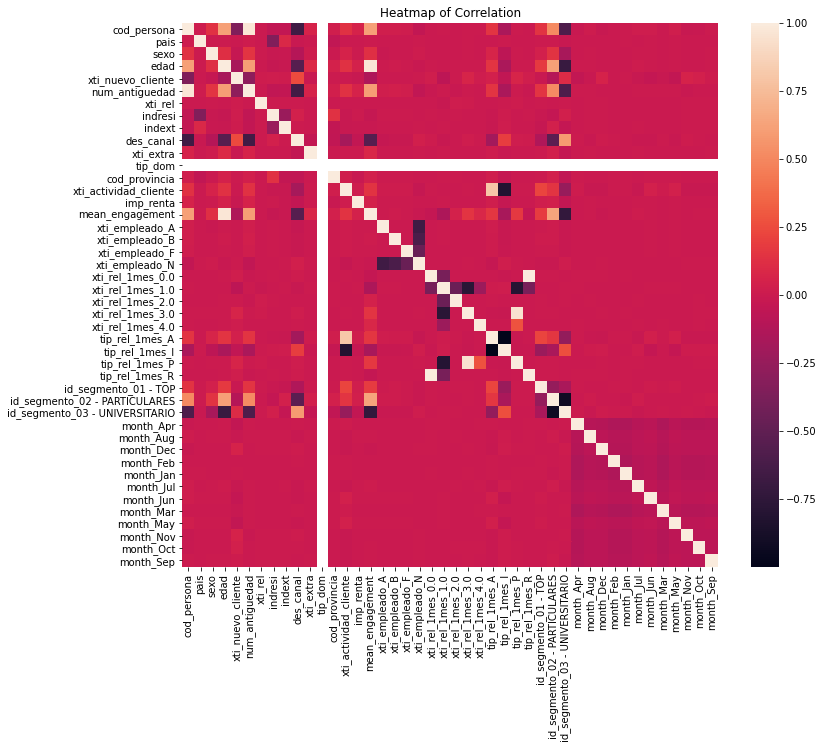

In [73]:
# plotting correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

corr = corr.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [74]:
# defining X and Y for feature selection

df_model = df.drop('mes', axis=1)
df_model = df.drop('cod_persona', axis=1)

X = df_model[[x for x in features if x not in ['mes','cod_persona']]]
y = df_model[targets]

In [75]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00108
Feature: 1, Score: 0.01710
Feature: 2, Score: 0.11028
Feature: 3, Score: 0.00265
Feature: 4, Score: 0.20500
Feature: 5, Score: 0.00001
Feature: 6, Score: 0.00065
Feature: 7, Score: 0.00599
Feature: 8, Score: 0.08138
Feature: 9, Score: 0.00078
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.10481
Feature: 12, Score: 0.03542
Feature: 13, Score: 0.20137
Feature: 14, Score: 0.10633
Feature: 15, Score: 0.00053
Feature: 16, Score: 0.00016
Feature: 17, Score: 0.00012
Feature: 18, Score: 0.00042
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00003
Feature: 21, Score: 0.00002
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.01990
Feature: 25, Score: 0.01830
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.01267
Feature: 29, Score: 0.01284
Feature: 30, Score: 0.01089
Feature: 31, Score: 0.00534
Feature: 32, Score: 0.00354
Feature: 33, Score: 0.00391
Feature: 34, Score: 0.00512
Feature: 35, Score: 0.00512
Fe

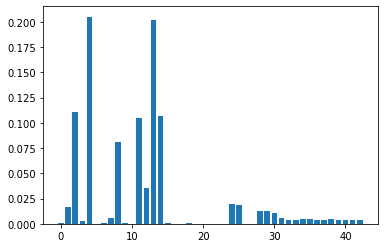

In [76]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [77]:
# sorting importance
import numpy as np
import operator

aux_dict = dict(zip(X.columns,importance))
# sorted(importance_dict.values())

importance_sorted = dict(sorted(aux_dict.items(), key=operator.itemgetter(1), reverse = True))
importance_sorted

{'num_antiguedad': 0.20500252157035204,
 'imp_renta': 0.20136811351309145,
 'edad': 0.11027650788074414,
 'mean_engagement': 0.10632825483100396,
 'cod_provincia': 0.10480586809428188,
 'des_canal': 0.08138182851135572,
 'xti_actividad_cliente': 0.03542000094822644,
 'tip_rel_1mes_A': 0.01990171748920686,
 'tip_rel_1mes_I': 0.01829838419205556,
 'sexo': 0.017100927487767162,
 'id_segmento_02 - PARTICULARES': 0.012836455174566577,
 'id_segmento_01 - TOP': 0.012668727324416826,
 'id_segmento_03 - UNIVERSITARIO': 0.010892470595693036,
 'indext': 0.005992488114392306,
 'month_Apr': 0.005339957149627976,
 'month_Mar': 0.005148767503019537,
 'month_Jan': 0.005116390068105283,
 'month_Feb': 0.005116141646543173,
 'month_May': 0.004202407885787839,
 'month_Jun': 0.0040724504081305095,
 'month_Dec': 0.003909785181171298,
 'month_Oct': 0.003744259113926255,
 'month_Nov': 0.003729515198709038,
 'month_Sep': 0.003723417706739703,
 'month_Jul': 0.0036010044477600674,
 'month_Aug': 0.003542641918433

([<matplotlib.axis.XTick at 0x2c28a43fd90>,
 [Text(0, 0, 'num_antiguedad'),
  Text(1, 0, 'imp_renta'),
  Text(2, 0, 'edad'),
  Text(3, 0, 'mean_engagement'),
  Text(4, 0, 'cod_provincia'),
  Text(5, 0, 'des_canal'),
  Text(6, 0, 'xti_actividad_cliente'),
  Text(7, 0, 'tip_rel_1mes_A'),
  Text(8, 0, 'tip_rel_1mes_I'),
  Text(9, 0, 'sexo'),
  Text(10, 0, 'id_segmento_02 - PARTICULARES'),
  Text(11, 0, 'id_segmento_01 - TOP'),
  Text(12, 0, 'id_segmento_03 - UNIVERSITARIO'),
  Text(13, 0, 'indext'),
  Text(14, 0, 'month_Apr'),
  Text(15, 0, 'month_Mar'),
  Text(16, 0, 'month_Jan'),
  Text(17, 0, 'month_Feb'),
  Text(18, 0, 'month_May'),
  Text(19, 0, 'month_Jun'),
  Text(20, 0, 'month_Dec'),
  Text(21, 0, 'month_Oct'),
  Text(22, 0, 'month_Nov'),
  Text(23, 0, 'month_Sep'),
  Text(24, 0, 'month_Jul'),
  Text(25, 0, 'month_Aug'),
  Text(26, 0, 'xti_nuevo_cliente'),
  Text(27, 0, 'pais'),
  Text(28, 0, 'xti_extra'),
  Text(29, 0, 'indresi'),
  Text(30, 0, 'xti_empleado_A'),
  Text(31, 0, 'x

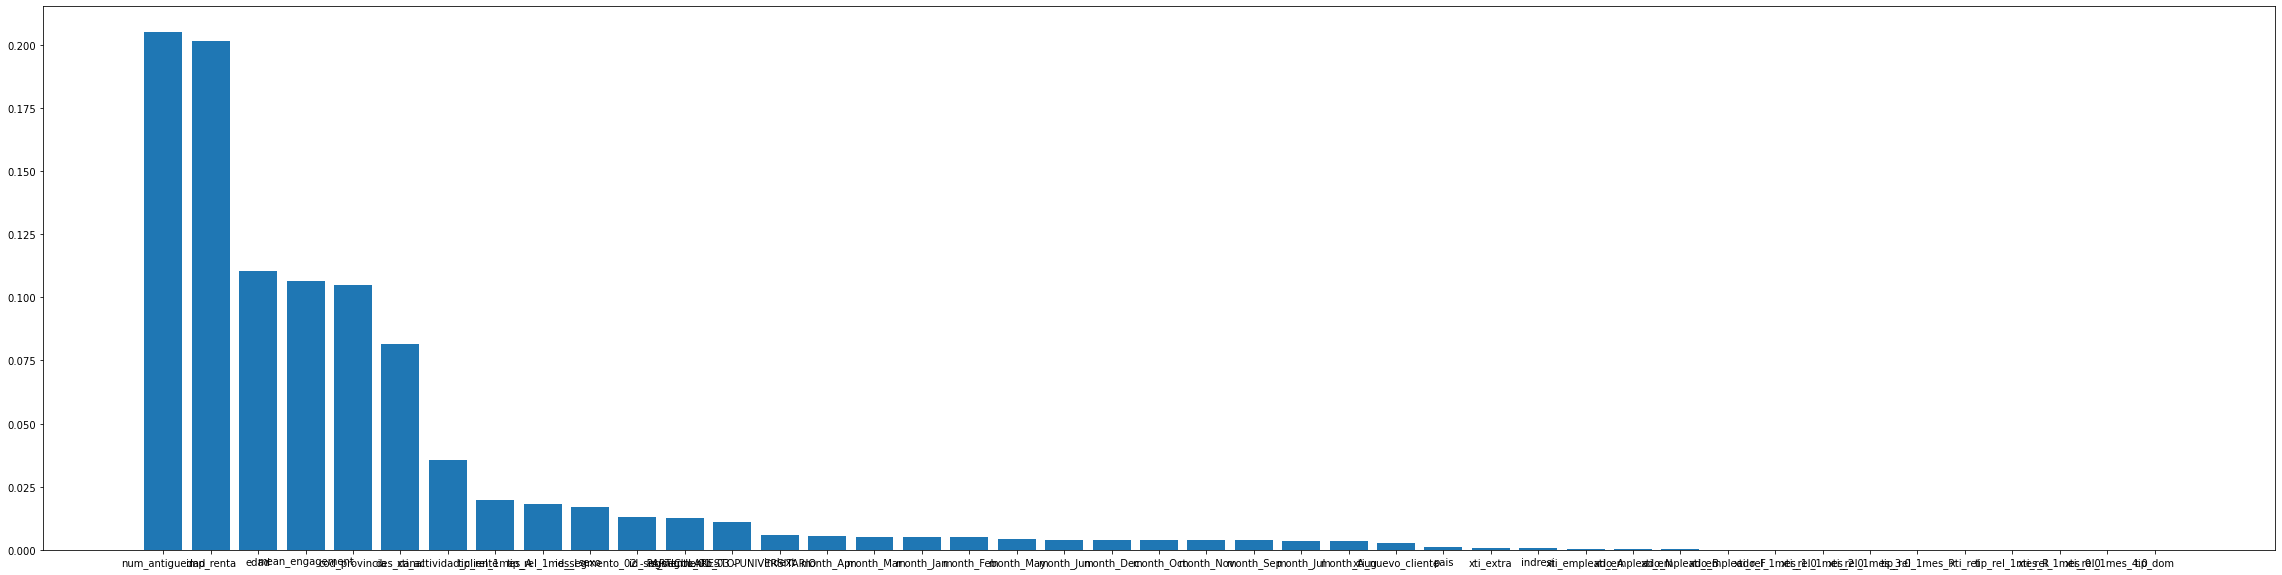

In [78]:
# plotting sorted importance
plt.figure(figsize=(40,10) )
plt.bar(range(len(importance_sorted)), list(importance_sorted.values()), align='center')
plt.xticks(range(len(importance_sorted)), list(importance_sorted.keys()))

In [98]:
# feature selections
threshold = 0.105
good_cols = []
importances = []

for col_name, importance in importance_sorted.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if importance > threshold:
        good_cols.append(col_name)
        importances.append(importance)
good_cols

['num_antiguedad', 'imp_renta', 'edad', 'mean_engagement']

In [99]:
# sum of importances using 0.05 threshold explain the 81 %
sum(importances)

0.6229753977951916

,cod_persona,mes,pais,sexo,edad,xti_nuevo_cliente,num_antiguedad,xti_rel,indresi,indext,des_canal,xti_extra,tip_dom,cod_provincia,xti_actividad_cliente,imp_renta,mean_engagement,xti_empleado_A,xti_empleado_B,xti_empleado_F,xti_empleado_N,xti_rel_1mes_0.0,xti_rel_1mes_1.0,xti_rel_1mes_2.0,xti_rel_1mes_3.0,xti_rel_1mes_4.0,tip_rel_1mes_A,tip_rel_1mes_I,tip_rel_1mes_P,tip_rel_1mes_R,id_segmento_01 - TOP,id_segmento_02 - PARTICULARES,id_segmento_03 - UNIVERSITARIO,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
31537,1008590,2015-02-28,16,1,45,0,115,0,1,0,23,0,1,28,1,62736.12,6.926724,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
31538,1008582,2015-02-28,16,0,65,0,115,0,1,0,42,0,1,28,0,101297.34,8.280778,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
31539,1008547,2015-02-28,16,1,52,0,115,0,1,0,94,0,1,39,1,64413.75,7.429623,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
31540,1008663,2015-02-28,16,1,48,0,114,0,1,0,93,0,1,28,1,1242325.23,7.146723,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
31542,1008466,2015-02-28,16,1,49,0,115,0,1,0,94,0,1,43,0,66302.13,7.218520,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63150,496506,2015-02-28,16,1,24,0,30,0,1,0,116,0,1,18,1,56162.73,5.117500,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
63151,496183,2015-02-28,16,0,28,0,30,0,1,0,116,0,1,32,1,44108.25,5.510023,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
63152,496406,2015-02-28,16,1,43,0,30,0,1,0,116,0,1,15,1,95295.48,6.775959,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
63153,496434,2015-02-28,16,1,23,0,30,0,1,0,116,0,1,26,1,104179.59,5.014352,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [81]:
# Trying to train with febrary 2015 and predict febrary 2016

X_train = df_status[df_status["mes"] == '2015-02-28'][good_cols]
y_train = df_status[df_status["mes"] == '2015-02-28'][targets]
X_test = df_status[df_status["mes"] == '2016-02-28'][good_cols]
y_test = df_status[df_status["mes"] == '2016-02-28'][targets]

['num_antiguedad',
 'imp_renta',
 'edad',
 'mean_engagement',
 'cod_provincia',
 'des_canal']

In [100]:
# splitting the data using balanced partition
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

seed = 23
test_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X[good_cols], y, test_size=test_size, random_state=seed)
X_train

,num_antiguedad,imp_renta,edad,mean_engagement
487686,113,101297.34,47,7.074175
567944,150,61138.56,50,7.289588
213702,32,35462.73,61,8.028770
572576,85,64330.89,50,7.289588
106988,154,56610.06,50,7.289588
...,...,...,...,...
472471,14,101297.34,24,5.117500
638530,30,110100.87,25,5.218520
84015,2,122708.22,28,5.510023
427428,28,80402.43,22,4.908936


In [ ]:
import xgboost as xgb
from numpy import loadtxt
from sklearn.multioutput import MultiOutputClassifier


# fit model no training data
xgb_estimator = xgb.XGBClassifier(objective='binary:logistic')

# create MultiOutputClassifier instance with XGBoost model inside
multilabel_model = MultiOutputClassifier(xgb_estimator)

# fit the model
multilabel_model.fit(X_train, y_train)

C:\Users\uba_p\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
# making predictions for test data
from sklearn.metrics import accuracy_score
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, multilabel_model.predict(X_test))*100))


C:\Users\uba_p\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Confusion matrix for label ind_prod1:


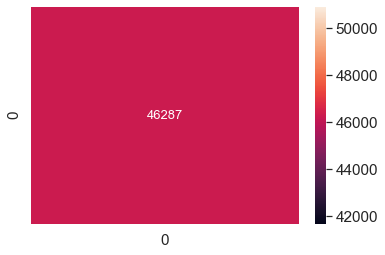

Confusion matrix for label ind_prod2:


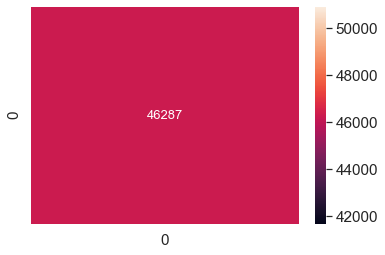

Confusion matrix for label ind_prod3:


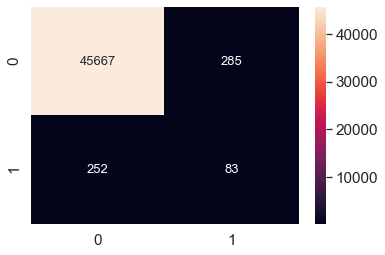

Confusion matrix for label ind_prod4:


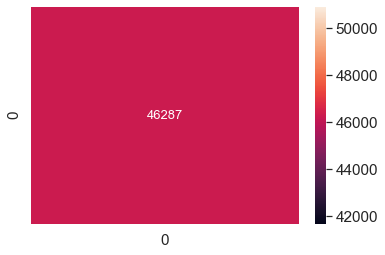

Confusion matrix for label ind_prod5:


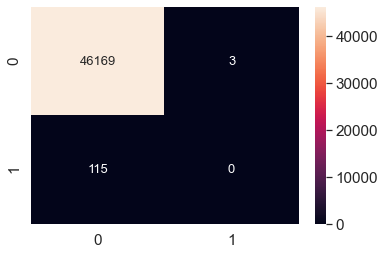

Confusion matrix for label ind_prod6:


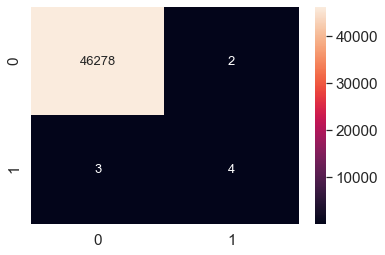

Confusion matrix for label ind_prod7:


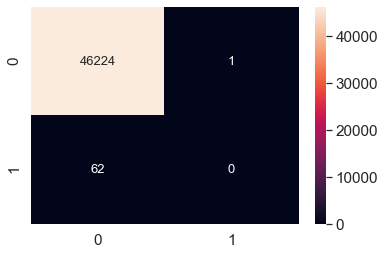

Confusion matrix for label ind_prod8:


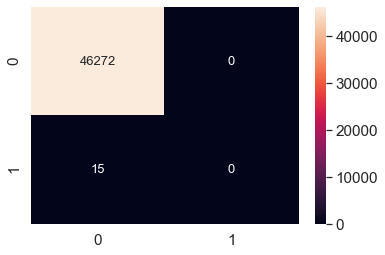

Confusion matrix for label ind_prod9:


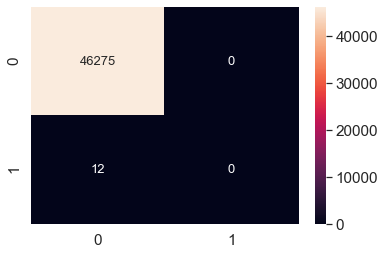

Confusion matrix for label ind_prod10:


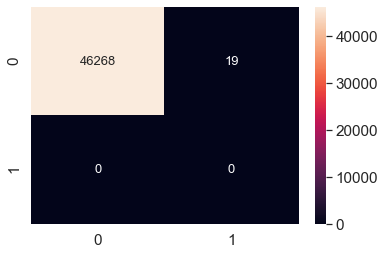

Confusion matrix for label ind_prod11:


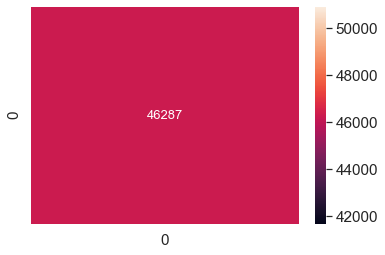

Confusion matrix for label ind_prod12:


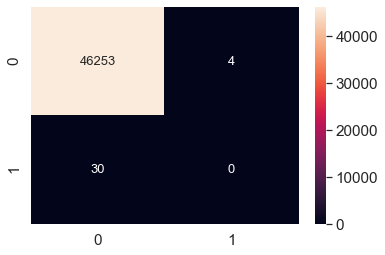

Confusion matrix for label ind_prod13:


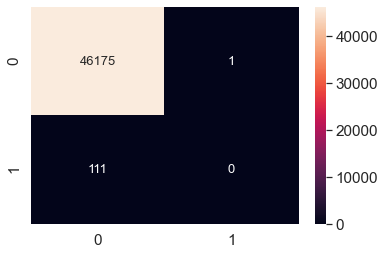

Confusion matrix for label ind_prod14:


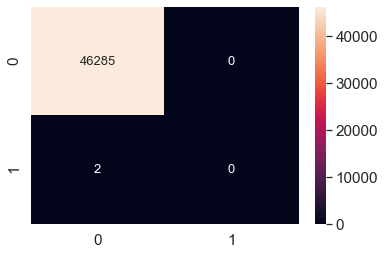

Confusion matrix for label ind_prod15:


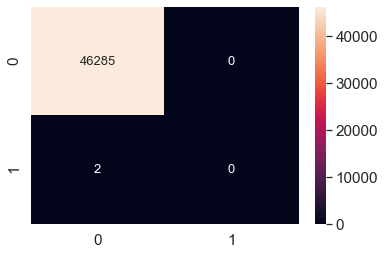

Confusion matrix for label ind_prod16:


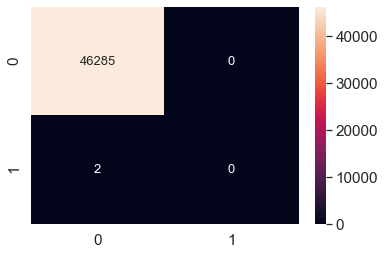

Confusion matrix for label ind_prod17:


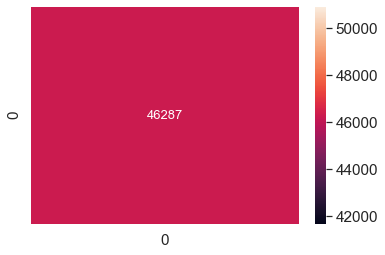

Confusion matrix for label ind_prod18:


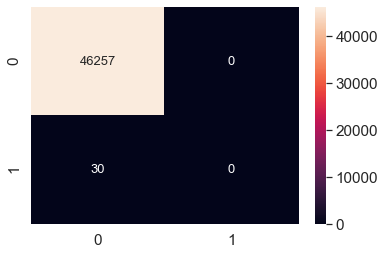

Confusion matrix for label ind_prod19:


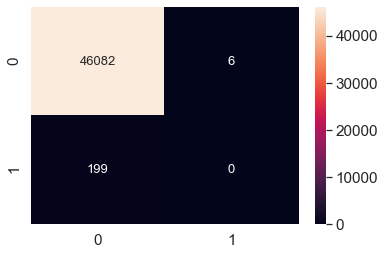

Confusion matrix for label ind_prod20:


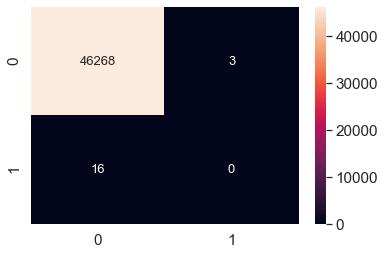

Confusion matrix for label ind_prod21:


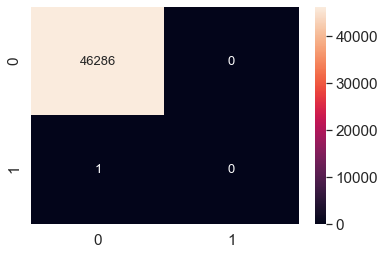

Confusion matrix for label ind_prod22:


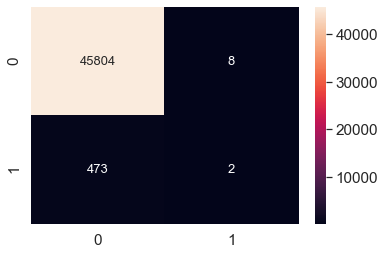

Confusion matrix for label ind_prod23:


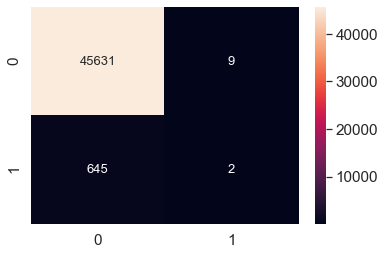

Confusion matrix for label ind_prod24:


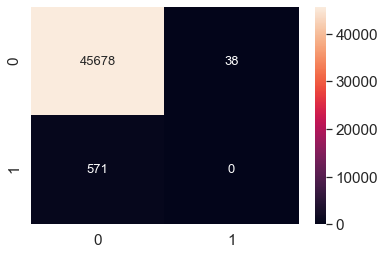

Confusion matrix for label ind_prod25:


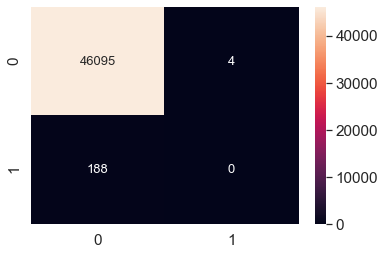

In [86]:
# confusion matrix after training and predict over test data
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix

y_true = np.array(y_test)
y_pred = np.array(multilabel_model.predict(X_test))

labels = targets

conf_mat_dict={}

for label_col in range(len(labels)):
    y_true_label = y_true[:, label_col]
    y_pred_label = y_pred[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)

for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))

    df_cm = pd.DataFrame(matrix, range(len(matrix)), range(len(matrix)))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 13}, fmt='g') # font size

    plt.show()